In [1]:
!pip install ultralytics
!git clone https://github.com/ultralytics/ultralytics.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 21.5 MB/s eta 0:00:0000:01
Cloning into 'ultralytics'...
remote: Enumerating objects: 51643, done.
remote: Counting objects: 100% (724/724), done.
remote: Compressing objects: 100% (500/500), done.
remote: Total 51643 (delta 500), reused 243 (delta 224), pack-reused 50919 (from 4)
Receiving objects: 100% (51643/51643), 30.02 MiB | 30.11 MiB/s, done.
Resolving deltas: 100% (37877/37877), done.


In [1]:
from ultralytics import YOLO
import pandas as pd
import os
from torchvision import transforms
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import shutil
from collections import defaultdict
import json
from pathlib import Path
import os
from PIL import Image, ImageDraw, ImageFont
from numpy import asarray
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten,Dense,Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam, Adamax
tf.keras.backend.clear_session()
from tensorflow.keras.callbacks import CSVLogger
np.random.seed(200)
# !wandb disabled

import warnings
warnings.filterwarnings("ignore")

In [3]:
model=YOLO('yolov8m-seg.pt')
model.train(
        project="VCOR",
        name="yolov8m-seg",
        deterministic=True,
        seed=43,
        data="coco128-seg.yaml",
        save=True,
        save_period=5,
        pretrained=True,
        imgsz=224,
        epochs=8,
        batch=4,
        workers=8,
        val=True,
        lr0=0.018,
        patience=10,
        optimizer="SGD",
        momentum=0.947,
        weight_decay=0.0005,
        close_mosaic=3,
    )

100%|██████████| 52.4M/52.4M [00:00<00:00, 269MB/s]


Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=coco128-seg.yaml, epochs=8, time=None, patience=10, batch=4, imgsz=224, save=True, save_period=5, cache=False, device=None, workers=8, project=VCOR, name=yolov8m-seg, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=43, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=3, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 6.79M/6.79M [00:00<00:00, 104MB/s]
Unzipping /kaggle/working/datasets/coco128-seg.zip to /kaggle/working/datasets/coco128-seg...: 100%|██████████| 263/263 [00:00<00:00, 3902.27file/s]

Dataset download success ✅ (0.8s), saved to /kaggle/working/datasets



100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 5.35M/5.35M [00:00<00:00, 127MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 878.21it/s]

train: New cache created: /kaggle/working/datasets/coco128-seg/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to VCOR/yolov8m-seg/labels.jpg... 
optimizer: SGD(lr=0.018, momentum=0.947) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to VCOR/yolov8m-seg
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/8      1.25G      1.267      3.026      2.716      1.217         34        224: 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.11it/s]


                   all        128        929      0.681      0.507      0.565      0.429      0.765      0.448      0.527      0.326

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/8      1.25G      1.308      2.895      2.103      1.215         52        224: 100%|██████████| 32/32 [00:03<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.61it/s]


                   all        128        929      0.726      0.465      0.543      0.401      0.704      0.434      0.509      0.316

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/8      1.26G      1.256      2.725      1.913      1.179         28        224: 100%|██████████| 32/32 [00:03<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.32it/s]


                   all        128        929      0.697      0.474      0.518      0.386      0.645       0.44      0.473        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/8      1.26G        1.2      2.733      1.534      1.138         37        224: 100%|██████████| 32/32 [00:03<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.81it/s]


                   all        128        929      0.694      0.462      0.502      0.372      0.666      0.444      0.471      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/8      1.26G      1.178      2.647      1.652      1.146         27        224: 100%|██████████| 32/32 [00:03<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.25it/s]


                   all        128        929      0.685      0.494      0.525       0.39      0.661      0.446      0.481      0.301
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        6/8      1.26G      1.274      2.657      1.603      1.147         19        224: 100%|██████████| 32/32 [00:03<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.43it/s]


                   all        128        929      0.768      0.474      0.524      0.395      0.727      0.449      0.478      0.303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        7/8      1.26G      1.214      2.574      1.544      1.128         39        224: 100%|██████████| 32/32 [00:03<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.54it/s]


                   all        128        929      0.726      0.489      0.539      0.403      0.693       0.46      0.504      0.312

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        8/8      1.26G      1.207      2.463      1.471      1.114         14        224: 100%|██████████| 32/32 [00:03<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.21it/s]


                   all        128        929      0.703      0.502      0.552      0.413      0.691      0.458      0.506      0.308

8 epochs completed in 0.014 hours.
Optimizer stripped from VCOR/yolov8m-seg/weights/last.pt, 54.9MB
Optimizer stripped from VCOR/yolov8m-seg/weights/best.pt, 54.9MB

Validating VCOR/yolov8m-seg/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,268,704 parameters, 0 gradients, 110.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.06it/s]


                   all        128        929       0.68      0.507      0.565      0.429      0.764      0.448      0.527      0.326
                person         61        254      0.634        0.6      0.641       0.43       0.75      0.496      0.579      0.284
               bicycle          3          6      0.266      0.167       0.17       0.17      0.312      0.167       0.17      0.119
                   car         12         46      0.704      0.087      0.114      0.084      0.581     0.0435     0.0783     0.0287
            motorcycle          4          5      0.662          1      0.962      0.763      0.819        0.8      0.906      0.503
              airplane          5          6       0.81      0.833      0.842      0.773      0.863      0.833      0.842      0.408
                   bus          5          7      0.618      0.571      0.671      0.604      0.733      0.571      0.671      0.552
                 train          3          3      0.733          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79ed03459000>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,

In [2]:
# import shutil

# # Define the source and destination paths
# source_path = "/kaggle/working/VCOR/yolov8m-seg/weights/best.pt"  # Best model checkpoint
# destination_path = "/kaggle/working/yolov8m-seg_best.pt"

# # Copy the model checkpoint to Kaggle's working directory
# shutil.copy(source_path, destination_path)

# print(f"Model saved to: {destination_path}")

In [3]:
# #------------------------
# # Method 1
# #------------------------

# def predict_image(img_path):
#     img=cv2.imread(img_path)
#     detect_result=model(img)
#     detect_img=detect_result[0].plot()


#     plt.imshow(detect_img)
#     return detect_img

# predict_image('/kaggle/input/vcor-vehicle-color-recognition-dataset/test/beige/02e37c0e56.jpg')


0: 224x224 1 person, 2 buss, 292.9ms
Speed: 3.2ms preprocess, 292.9ms inference, 6.7ms postprocess per image at shape (1, 3, 224, 224)


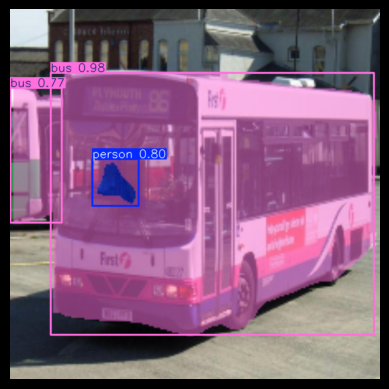

array([[[240, 233, 223],
        [240, 233, 223],
        [240, 233, 223],
        ...,
        [ 64,  67,  58],
        [ 73,  72,  63],
        [ 74,  73,  63]],

       [[240, 233, 223],
        [240, 233, 223],
        [240, 233, 223],
        ...,
        [ 64,  67,  58],
        [ 73,  72,  62],
        [ 74,  73,  63]],

       [[240, 233, 223],
        [240, 233, 223],
        [240, 233, 223],
        ...,
        [ 65,  66,  57],
        [ 74,  71,  61],
        [ 75,  72,  62]],

       ...,

       [[148, 166, 169],
        [148, 166, 169],
        [148, 166, 170],
        ...,
        [156, 185, 188],
        [158, 187, 190],
        [158, 187, 190]],

       [[148, 166, 169],
        [148, 166, 169],
        [148, 166, 170],
        ...,
        [163, 193, 196],
        [165, 196, 199],
        [165, 196, 199]],

       [[148, 166, 169],
        [148, 166, 169],
        [148, 166, 170],
        ...,
        [163, 194, 196],
        [166, 197, 200],
        [166, 197, 200]]

In [4]:
#------------------------
# Method 2
#------------------------


model = YOLO('yolov8m-seg_best.pt')

def predict_image(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Perform prediction using the saved model
    detect_result = model(img)

    # Plot the detection results
    detect_img = detect_result[0].plot()

    # Display the image with detections
    plt.imshow(cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.axis('off')  # Hide axes
    plt.show()

    return detect_img

# Test the function
predict_image('00e4cd60e84c0463_jpg.rf.c14f84986360a80ea34f8ae1d2fe822e.jpg')

In [7]:
train = '../input/vcor-vehicle-color-recognition-dataset/train/'
val = '../input/vcor-vehicle-color-recognition-dataset/val/'
test = '../input/vcor-vehicle-color-recognition-dataset/test/'

In [8]:
def count_images(dataset):
    """
    dataset: 'train/' or 'test/'
    """
    v = []
    for i in sorted(os.listdir(dataset)):
        v.append(len(os.listdir(dataset+i)))
    df = pd.DataFrame({'color': sorted(os.listdir(dataset)), 'count': v})
    return(df)

In [11]:
df = count_images(train)
df

,color,count
0,beige,421
1,black,406
2,blue,742
3,brown,565
4,gold,210
5,green,563
6,grey,428
7,orange,534
8,pink,483
9,purple,536


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   15 non-null     object
 1   count   15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [13]:
df.describe()

,count
count,15.000000
mean,484.466667
std,129.115600
min,210.000000
25%,404.500000
50%,483.000000
75%,564.000000
max,742.000000


In [14]:
class_subset = sorted(os.listdir(train))
print(class_subset)

['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']


In [5]:
isize = 224

In [16]:
model_name='EfficientNetB3'

base_model=tf.keras.applications.EfficientNetB3(
    include_top=False, 
    weights='imagenet',
    input_shape=(isize, isize, 3), 
    pooling='max'
)
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)
output=Dense(len(class_subset)-3, activation='softmax')(x)
model1=Model(inputs=base_model.input, outputs=output)
model1.compile(Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
model1.save('/kaggle/working/color_detection_model.keras')

In [19]:
# Load the saved model
loaded_model = load_model('/kaggle/working/color_detection_model.keras')

# Test with a sample image
sample_img_path = '/kaggle/input/vcor-vehicle-color-recognition-dataset/test/pink/00caa0c07c.jpg'
img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(isize, isize))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = loaded_model.predict(img_array)
predicted_class = class_subset[np.argmax(prediction)]
print(f"Predicted color: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted color: green


In [20]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    brightness_range=None,
    width_shift_range=0.5,
    rotation_range=False,
    horizontal_flip=True,
    vertical_flip=False
)

valid_generator = ImageDataGenerator(rescale=1/255.)

In [21]:
# test_generator = ImageDataGenerator(rescale=1./255)

In [22]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [23]:
def move_sublist(lst, start_index, end_index, new_index):
    sublist = lst[start_index:end_index+1]
    del lst[start_index:end_index+1]
    lst[new_index:new_index] = sublist

In [24]:
def replace_element(lst, target, replacement):
    for i in range(len(lst)):
        if lst[i] == target:
            lst[i] = replacement

In [26]:
def dataframe_keras(sourcedir):
    coll_labelnames = []
    coll_idfiles = []

    for i in os.listdir(sourcedir):
        idfiles = os.listdir(os.path.join(sourcedir, i))
        labelnames = len(idfiles) * [str(i)]
        coll_labelnames.append(labelnames)
        coll_idfiles.append(idfiles)
    labelss = flatten(coll_labelnames)

    for i in range(len(labelss)):
        if labelss[i] == 'tan':
            index_first_tan = i

    reverse_flatten = flatten(coll_labelnames.copy())
    reverse_flatten.reverse()

    for j in range(len(reverse_flatten)):
        if reverse_flatten[j] == 'tan':
            index_last_tan = len(reverse_flatten) - j - 1
        if reverse_flatten[j] == 'beige':
            index_last_beige = len(reverse_flatten) - j - 1

    for i in range(len(labelss)):
        if labelss[i] == 'silver':
            index_first_silv = i

    reverse_flatten = flatten(coll_labelnames.copy())
    reverse_flatten.reverse()

    for j in range(len(reverse_flatten)):
        if reverse_flatten[j] == 'silver':
            index_last_silv = len(reverse_flatten) - j - 1
        if reverse_flatten[j]=='grey':
            index_last_grey=len(reverse_flatten) - j - 1


    labels= flatten(coll_labelnames)

    idfiles=flatten(coll_idfiles)


    move_sublist(labels, index_first_tan, index_last_tan,index_last_beige)
    move_sublist(idfiles, index_first_tan, index_last_tan,index_last_beige)
    replace_element(labels, 'tan', 'beige')
    move_sublist(labels, index_first_silv, index_last_silv,index_last_grey)
    move_sublist(idfiles, index_first_silv, index_last_silv,index_last_grey)
    replace_element(labels, 'silver', 'grey')


    for i in range(len(labelss)):
        if labelss[i] == 'gold':
            index_first_gold = i

    reverse_flatten = flatten(coll_labelnames.copy())
    reverse_flatten.reverse()

    for j in range(len(reverse_flatten)):
        if reverse_flatten[j] == 'gold':
            index_last_gold = len(reverse_flatten) - j - 1
        if reverse_flatten[j] == 'beige':
            index_last_beige = len(reverse_flatten) - j - 1
    move_sublist(labels, index_first_gold, index_last_gold,index_last_beige)
    move_sublist(idfiles, index_first_gold, index_last_gold,index_last_beige)
    replace_element(labels, 'gold', 'beige')



    df = pd.DataFrame({'label': labels, 'idfiles': idfiles})
    df['id'] = str(sourcedir) + df['label'] + '/' + df['idfiles']

    return(df)

In [27]:
train_df = dataframe_keras(train)
valid_df = dataframe_keras(val)
test_df = dataframe_keras(test)

In [28]:
train_df.shape, valid_df.shape, test_df.shape

((7267, 3), (1550, 3), (1556, 3))

In [29]:
display(train_df.head())
display(valid_df.head())
display(test_df.head())

,label,idfiles,id
0,orange,2cc754bf26.jpg,../input/vcor-vehicle-color-recognition-datase...
1,orange,a48677b1fe.jpg,../input/vcor-vehicle-color-recognition-datase...
2,orange,8b0bd6dd65.jpg,../input/vcor-vehicle-color-recognition-datase...
3,orange,bfe246fdb1.jpg,../input/vcor-vehicle-color-recognition-datase...
4,orange,f25641efb1.jpg,../input/vcor-vehicle-color-recognition-datase...


,label,idfiles,id
0,orange,251acea001.jpg,../input/vcor-vehicle-color-recognition-datase...
1,orange,4eff9ff2ad.jpg,../input/vcor-vehicle-color-recognition-datase...
2,orange,b790d568bc.jpg,../input/vcor-vehicle-color-recognition-datase...
3,orange,386e3b929b.jpg,../input/vcor-vehicle-color-recognition-datase...
4,orange,e3288abf91.jpg,../input/vcor-vehicle-color-recognition-datase...


,label,idfiles,id
0,orange,0220efcd31.jpg,../input/vcor-vehicle-color-recognition-datase...
1,orange,0576de504b.jpg,../input/vcor-vehicle-color-recognition-datase...
2,orange,d96af8baba.jpg,../input/vcor-vehicle-color-recognition-datase...
3,orange,2e96e68232.jpg,../input/vcor-vehicle-color-recognition-datase...
4,orange,8f44a1ca83.jpg,../input/vcor-vehicle-color-recognition-datase...


In [33]:
# Cache Processed DataFrames

# Define DataFrame paths
train_df_path = '/kaggle/working/train_df.csv'
valid_df_path = '/kaggle/working/valid_df.csv'
test_df_path = '/kaggle/working/test_df.csv'

train_df.to_csv(train_df_path, index=False)
valid_df.to_csv(valid_df_path, index=False)
test_df.to_csv(test_df_path, index=False)

In [30]:
BATCH_SIZE = 32

train_gen=train_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col="id",
    y_col="label",
    subset="training",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

valid_gen=valid_generator.flow_from_dataframe(
    dataframe=valid_df,
    directory=None,
    x_col="id",
    y_col="label",
    subset="training",
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="categorical",
    target_size=(isize, isize))

# test_gen=test_generator.flow_from_dataframe(
#     dataframe=test_df,
#     directory=None,
#     x_col="id",
#     y_col="label",
#     subset="training",
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     class_mode="categorical",
#     target_size=(isize, isize))

Found 6297 validated image filenames belonging to 12 classes.
Found 1343 validated image filenames belonging to 12 classes.


In [31]:
steps_per_epoch = train_gen.samples // BATCH_SIZE
val_steps = valid_gen.samples // BATCH_SIZE
n_epochs = 80

csv_logger = CSVLogger('training.log', separator=',', append=False)



early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10, 
                           restore_best_weights=True, 
                           mode='min'
                          )

history = model1.fit(train_gen, 
                     epochs=12, 
                     steps_per_epoch=steps_per_epoch, 
                     validation_data=valid_gen, 
                     validation_steps=val_steps, 
                     callbacks=[early_stop , csv_logger], 
                     verbose=True, 
                     shuffle = True
                    )

Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.1598 - loss: 3.0057 - val_accuracy: 0.0671 - val_loss: 4.5433
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5625 - loss: 1.3577 - val_accuracy: 0.1290 - val_loss: 3.7667
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 118s 581ms/step - accuracy: 0.5281 - loss: 1.4966 - val_accuracy: 0.1258 - val_loss: 3.3847
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 1.0034 - val_accuracy: 0.0968 - val_loss: 3.2383
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 101s 497ms/step - accuracy: 0.7074 - loss: 0.9206 - val_accuracy: 0.4756 - val_loss: 1.5986
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.5981 - val_accuracy: 0.4194 - val_loss: 1.5915
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 103s 507ms/step - accuracy: 0.7684 - loss: 0.7258 - val_accuracy: 0.8308 - val_loss: 0.5178
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3782 - va

In [35]:
# Save training configuration
training_config = {
    "steps_per_epoch": steps_per_epoch,
    "val_steps": val_steps,
    "n_epochs": n_epochs,
    "early_stop_config": {
        "monitor": "val_loss",
        "patience": 10,
        "restore_best_weights": True,
        "mode": "min"
    }
}

with open('/kaggle/working/training_config.json', 'w') as f:
    json.dump(training_config, f)

# Save training history
history_dict = {key: [float(val) for val in values] for key, values in history.history.items()}
with open('/kaggle/working/training_history.json', 'w') as f:
    json.dump(history_dict, f)

# Save the model
model1.save('/kaggle/working/color_detection_model.keras')

In [34]:
model1.save_weights("model_weights.weights.h5")

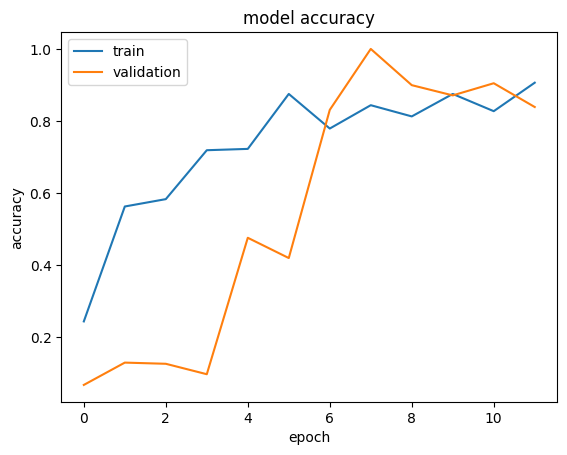

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
test_generator = ImageDataGenerator(rescale=1./255)

In [43]:
class_subset.remove('tan')
class_subset.remove('silver')
class_subset.remove('gold')

testgen = test_generator.flow_from_directory(test, 
                                             target_size=(isize, isize), 
                                             batch_size=1, 
                                             class_mode=None, 
                                             classes=class_subset, 
                                             shuffle=False 
                                            )

Found 1348 images belonging to 12 classes.


In [44]:
model_predict = model1.predict(testgen)

1348/1348 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


In [45]:
model_predict.shape

(1348, 12)

In [46]:
df_testprediction = pd.DataFrame(model_predict, index=testgen.filenames, columns=class_subset)

In [47]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_testprediction

,beige,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow
beige/02e37c0e56.jpg,0.1000,0.0203,0.0099,0.4056,0.0015,0.3048,0.0019,0.0186,0.0006,0.0067,0.0830,0.0470
beige/05aeb6ddec.jpg,0.3669,0.0164,0.0022,0.5536,0.0002,0.0484,0.0003,0.0019,0.0005,0.0029,0.0032,0.0035
beige/0b01008bee.jpg,0.2127,0.0003,0.0009,0.0042,0.0024,0.0009,0.0001,0.0005,0.0001,0.0004,0.7719,0.0056
beige/0c3bb456ee.jpg,0.9338,0.0002,0.0002,0.0407,0.0005,0.0029,0.0003,0.0020,0.0005,0.0001,0.0015,0.0173
beige/0e491569c8.jpg,0.8966,0.0007,0.0003,0.0547,0.0005,0.0011,0.0008,0.0111,0.0002,0.0001,0.0273,0.0067
...,...,...,...,...,...,...,...,...,...,...,...,...
yellow/fd1da2f797.jpg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.9997
yellow/fd3d2525fb.jpg,0.0194,0.0001,0.0002,0.0007,0.0009,0.0006,0.0002,0.0014,0.0000,0.0003,0.0014,0.9749
yellow/feacf53e9e.jpg,0.0023,0.0005,0.0025,0.0179,0.0219,0.0009,0.0022,0.0021,0.0024,0.0010,0.0015,0.9446
yellow/feeded3e6e.jpg,0.0000,0.0000,0.0004,0.0002,0.0000,0.0000,0.0001,0.0000,0.0002,0.0000,0.0000,0.9989


In [52]:
predicted_classes = np.argmax(model1.predict(testgen), axis=-1) #model.predict_classes(testgen). Argmax returns indices of max values
class_indices = train_gen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

1348/1348 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


In [53]:
testgen.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [54]:
predicted_classes

array([ 3,  3, 10, ..., 11, 11, 11])

In [55]:
len(predicted_classes)

1348

In [56]:
def display_results(y_true, y_preds, class_labels):

    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)

    results.sort_values(by='F-Score', ascending=False, inplace=True)
    global_acc = accuracy_score(y_true, y_preds)

    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]

        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]), color=("green" if pred_idx == true_idx else "red"))
    fig.savefig('testgallery.png')

In [57]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 82.34%


,Precision,Recall,F-Score,Support
green,0.9310,0.8926,0.9114,121.0000
yellow,0.7885,0.9919,0.8786,124.0000
red,0.8344,0.9265,0.8780,136.0000
blue,0.9695,0.7987,0.8759,159.0000
white,0.8316,0.9186,0.8729,86.0000
orange,0.9208,0.8158,0.8651,114.0000
beige,0.7978,0.7889,0.7933,90.0000
pink,0.7478,0.8350,0.7890,103.0000
purple,0.9744,0.6609,0.7876,115.0000
brown,0.6711,0.8264,0.7407,121.0000


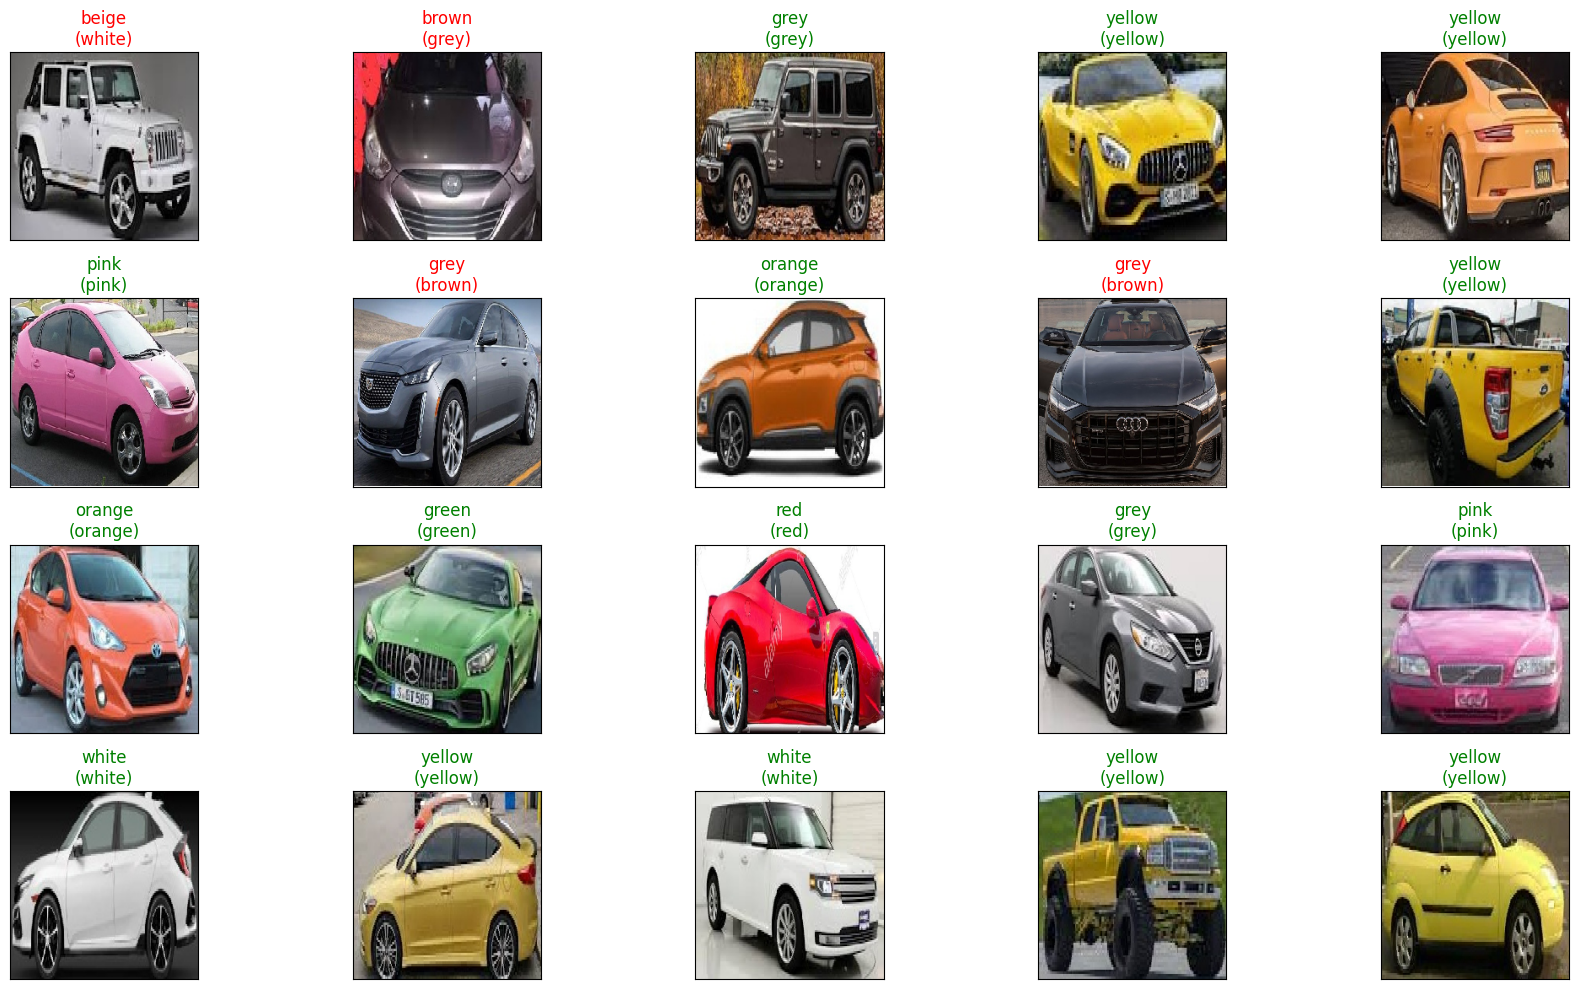

In [58]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [59]:
pd.DataFrame(confusion_matrix(true_classes, predicted_classes), index=list(class_indices.values()), columns=list(class_indices.values()) )

,beige,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow
beige,71,0,0,12,0,1,0,0,0,0,1,5
black,1,60,0,6,0,15,0,0,0,1,3,1
blue,2,7,127,6,2,6,0,1,2,0,3,3
brown,7,0,0,100,0,4,3,1,0,1,1,4
green,0,0,2,1,108,3,0,1,0,0,0,6
grey,2,6,0,12,2,61,1,1,0,0,6,1
orange,0,0,0,1,0,0,93,0,0,7,0,13
pink,0,0,0,0,0,0,0,86,0,15,2,0
purple,0,3,2,11,2,1,0,19,76,1,0,0
red,0,0,0,0,0,0,4,6,0,126,0,0


In [64]:
# Extract class names from the generator's class_indices (sorted order)
class_names = list(train_gen.class_indices.keys())

# Save class names to a JSON file
import json
with open('/kaggle/working/class_names.json', 'w') as f:
    json.dump(class_names, f)

In [67]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import json

# Load the saved model
model1 = load_model('/kaggle/working/color_detection_model.keras')

# Load class names
with open('/kaggle/working/class_names.json', 'r') as f:
    class_names = json.load(f)

def predict_color(img_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model1.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_color = class_names[predicted_index]

    return predicted_color


img_path = '/kaggle/input/vcor-vehicle-color-recognition-dataset/test/blue/00be3db68c.jpg'
color = predict_color(img_path)
print(f"Predicted color: {color}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted color: green


In [61]:
object_class, color = predict_object_and_color('/kaggle/input/vcor-vehicle-color-recognition-dataset/test/blue/00be3db68c.jpg')
print(f"Object: {object_class}, Color: {color}")


0: 128x224 1 car, 53.3ms
Speed: 1.6ms preprocess, 53.3ms inference, 2.6ms postprocess per image at shape (1, 3, 128, 224)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Object: car, Color: yellow


In [69]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.models import load_model

# Load your trained model and class names (if needed)
model1 = load_model('/kaggle/working/color_detection_model.keras')
with open('/kaggle/working/class_names.json', 'r') as f:
    class_names = json.load(f)

def detect_color(img_path, use_model=True):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    
    # Option 1: Use model1 to predict a predefined class
    if use_model:
        img_array = img / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        pred = model1.predict(img_array)
        predicted_class = class_names[np.argmax(pred)]
    else:
        predicted_class = None
    
    # Option 2: Detect dominant color via clustering (works for any color)
    pixels = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=1, n_init=10)
    kmeans.fit(pixels)
    dominant_rgb = kmeans.cluster_centers_[0].astype(int)
    
    # Map RGB to a color name (extend this palette as needed)
    color_palette = {
        (255, 0, 0): 'red', (0, 255, 0): 'green', (0, 0, 255): 'blue',
        (255, 255, 0): 'yellow', (128, 0, 128): 'purple', (255, 165, 0): 'orange',
        (255, 192, 203): 'pink', (165, 42, 42): 'brown', (255, 255, 255): 'white',
        (0, 0, 0): 'black', (192, 192, 192): 'silver', (255, 215, 0): 'gold'
    }
    
    # Find closest named color
    min_distance = float('inf')
    closest_color = 'unknown'
    for color_rgb, color_name in color_palette.items():
        distance = np.sqrt(np.sum((np.array(color_rgb) - dominant_rgb) ** 2))
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name
    
    return predicted_class, closest_color, tuple(dominant_rgb)

# Example usage
image_path = "/kaggle/input/vcor-vehicle-color-recognition-dataset/val/gold/006e9733de.jpg"
pred_class, closest_color, dominant_rgb = detect_color(image_path, use_model=True)

print(f"Model prediction: {pred_class}")
print(f"Closest named color: {closest_color}")
print(f"Dominant RGB: {dominant_rgb}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Model prediction: green
Closest named color: brown
Dominant RGB: (103, 88, 65)
